<h1><b>The Good Doctor - Linear Regression Training</b></h1>
By Alexander L. Myfia, Alrismany Abigail S., Viriya Savoeun

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functools import reduce
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
terms = ["TheGoodDoctor", "acute", "angina", "anti_inflammatory", 
        "autism", "benign", "biopsy", "bmi",
        "cellutitis", "edema", "embolism", "epidermis",
        "hypertension", "hypotension", "lesion", "malignant",
        "membrane", "neutrophils", "outpatient", "reflux",
        "remission", "savant", "surgery", "sutures"]

df_set = [pd.read_csv(f"keywords/{t}.csv", delimiter=',', on_bad_lines='skip') for t in terms]

In [38]:
for i in range(len(df_set)):
    df_set[i].reset_index(inplace = True)
    df_set[i].rename(columns={'index' : 'Date'},inplace=True)
    df_set[i].rename(columns={'Category: All categories':f'{terms[i]}'},inplace=True)
    df_set[i].fillna(0, inplace=True)
    df_set[i].drop(index=[0], inplace=True)

In [39]:
NewDF = reduce(lambda left, right: left.merge(right, on='Date'), df_set)
NewDF.head()

columns = terms.copy()
NewDF[columns] = NewDF[columns].apply(pd.to_numeric,  errors='coerce')

med_terms = terms.copy()
med_terms.remove('TheGoodDoctor')
NewDF['Average'] = NewDF[med_terms].mean(axis=1)

NewDF.head()

,Date,TheGoodDoctor,acute,angina,anti_inflammatory,autism,benign,biopsy,bmi,cellutitis,...,malignant,membrane,neutrophils,outpatient,reflux,remission,savant,surgery,sutures,Average
0,2017-09,49,64,63,60,0,63,67,57,76,...,9,86,40,0,67,0,88,78,87,53.869565
1,2017-10,100,70,71,64,0,68,72,62,85,...,10,92,44,0,74,0,100,78,87,58.608696
2,2017-11,60,68,65,56,0,61,69,43,48,...,10,36,35,0,72,0,72,74,84,48.260870
3,2017-12,47,59,58,61,0,53,65,49,43,...,8,27,32,0,75,0,69,71,74,44.565217
4,2018-01,71,70,62,75,0,59,71,70,75,...,9,29,39,0,81,0,78,80,83,52.043478


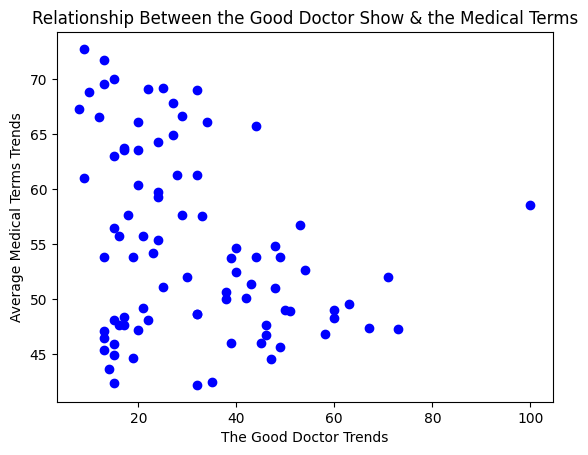

Correlation (r) = -0.29566460965031616


In [40]:
plt.scatter(NewDF['TheGoodDoctor'],NewDF['Average'],color='blue')
plt.xlabel('The Good Doctor Trends')
plt.ylabel('Average Medical Terms Trends')
plt.title('Relationship Between the Good Doctor Show & the Medical Terms')

plt.show()
correlation = NewDF['TheGoodDoctor'].corr(NewDF['Average'])
print(f"Correlation (r) = {correlation}")

In [41]:
NewDF.to_csv('The_Good_Doctor.csv', index=False)
dataset = pd.read_csv("The_Good_Doctor.csv", delimiter=',',on_bad_lines='skip')
dataset = dataset[['TheGoodDoctor', 'Average']]
dataset.head()

,TheGoodDoctor,Average
0,49,53.869565
1,100,58.608696
2,60,48.260870
3,47,44.565217
4,71,52.043478


Proportion: 50:50
MSE: 79.62555313349198 | R^2: -0.09712363551587777


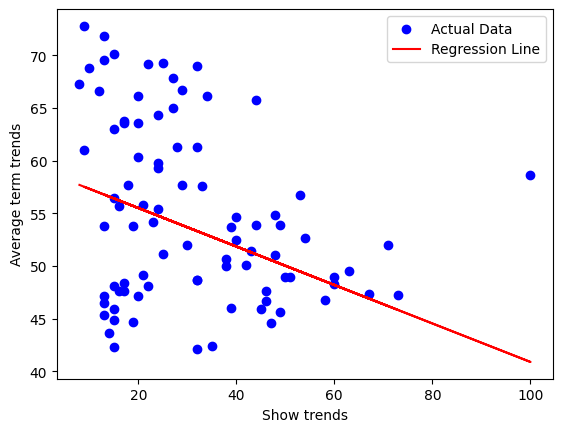

Proportion: 60:40
MSE: 87.09740399577251 | R^2: -0.10398828767209989


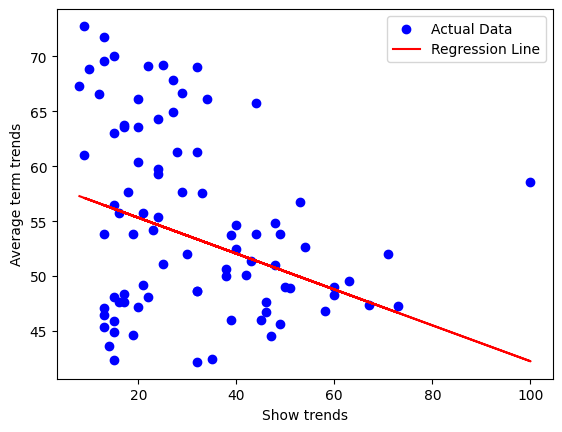

Proportion: 70:30
MSE: 84.72226315522128 | R^2: -0.04395748496078


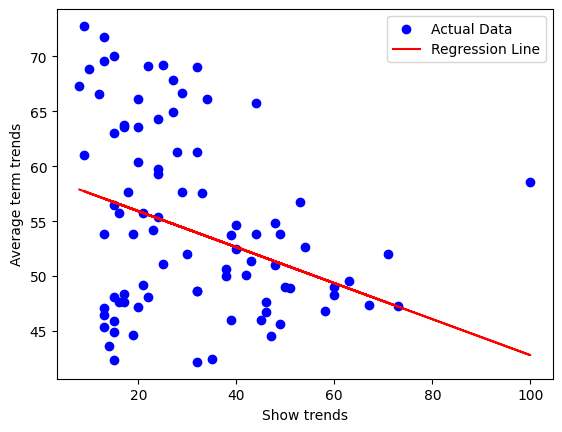

Proportion: 80:20
MSE: 67.45942956026039 | R^2: -0.05357911175894414


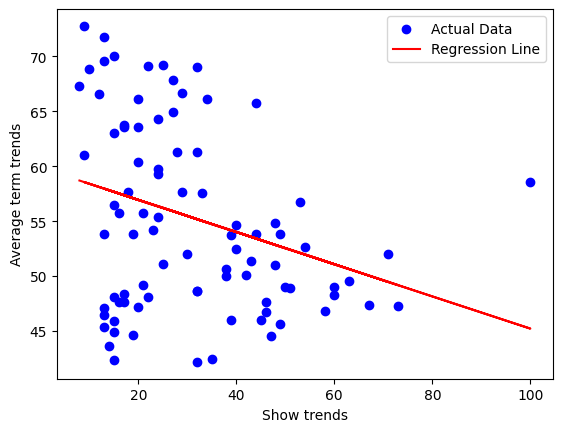

In [42]:
X, Y = dataset[['TheGoodDoctor']], dataset[['Average']]
lr_model = LinearRegression()
split_prop = [0.5, 0.4, 0.3, 0.2]

for sp in split_prop:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = sp, random_state = 2)
    lr_model.fit(x_train, y_train)
    y_pred = lr_model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    
    print(f"Proportion: {int(100 - sp*100)}:{int(sp*100)}")
    print(f"MSE: {mse} | R^2: {r2}")
    
    plt.scatter(X, Y, color = 'blue', label = 'Actual Data')
    plt.plot(X, lr_model.predict(X), color = 'red', label = 'Regression Line')
    plt.xlabel("Show trends")
    plt.ylabel("Average term trends")
    plt.legend()
    plt.show()

<hr>